In [1]:
%pwd

'/Users/mac/Library/Mobile Documents/com~apple~CloudDocs/GitHub/sales_data_analysis'

# 인사이트(중앙 편의점)
1. 소비 트랜드 만들기 
    - 고객별 총 소비량 감소
    - 누적 매출액 증가량 감소
    - 지역별, 소득수준 별 소비량 변화
    - 1 지역 고가품 소비 증가 경향
    - 5 지역 저가품 소비 증가 경향
       |지역|인구(명)|소득|컨셉|연령 분포|소비 집중 시간|
       |-|-|-|-|-|-|
       | 1지역 | 100 | 2억 | 부촌 | 고령남여 + 청년 | 일과 시간 소비 |
       | 2지역 | 150 | 1억 | 위성신도시 | 신혼 부부 + 어린 자녀 |  평일 오전, 주말 | 
       | 3지역 | 300 | 5천 | 업무지구 | 30~50대 생상가능인구 | 점심시간, 저녁, (특징: 주말 소비 급감) | 
       | 4지역 | 200 | 1천 | 대학가 | 20대 | 점심시간, 저녁, (특징: 주말 소비 급감) |
       | 5지역 | 250 | 3천 | 일반거주지구 | 노년층 | 늦은 밤 |
       
       -  소득은 정규분포로 데이터 입력
1. 트랜드 분석
    - 평균 1회 결제 금액이 큰 고객을 더 유치하기위한 마케팅 계획 수립을 위한 분석
    - 최근 변화한 소비 트렌드에 가장 민감하게 반응한 소득별 계층 분석

1. 데이터프레임
    - 상품 데이터프레임
>- product_num* : 상품 코드
>- price* : 상품 가격
>- price_grade : 고가 중가 저가 여부

    - 고객 데이터프레임
>- cusno* : 고객 번호
>- region* : 지역  
>- gender* : 성별  
>- age* : 나이  
>- income* : 급여  
>- grade_20 : 2020년 회원 등급
>- grade_21 : 2021년 회원 등급
>- ARPPU_20 : 2020년 회당 평균 결제액
>- ARPPU_21 : 2021년 회당 평균 결제액
>- AVC_20 : 2020년 연간 방문 횟수
>- AVC_21 : 2021년 연간 방문 횟수
>- purchase_trend : 고개 구매 추세 변화
    
    - 거래 데이터프레임
>- num_ts* : 거래 번호
>- cusno_ts* : 고객 변호
>- product_num_ts* : 상품코드
>- price_ts : 상품 가격
>- quantity* : 수량
>- amount : 해당 거래 매출
>- date*: 거래 날짜
>- year, weekday, hour : 거래 년도, 요일, 시간

 **변수명* <- 독립변수로 직접 입력해준 데이터**

In [2]:
from dateutil.parser import parse
from datetime import datetime
import warnings
import random
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore')

random.seed(1)
np.random.seed(1)

## 상품 목록 데이터프레임 만들기 : product

### 상품 목록 데이터프레임 양식 만들기

In [3]:
product = pd.DataFrame(columns=['product_num', 'price', 'price_grade'])
product

,product_num,price,price_grade


### 상품 목록 데이터프레임 데이터 채우기

#### 상품 코드 : product_num

In [4]:
product_num = np.arange(1, 101)
product.product_num = product_num

#### 상품 가격 : price

In [5]:
price = random.sample(list(range(1000, 100000)), 100)
product.price = price

### 상품 목록 데이터프레임 종속변수

#### 상품 가격 분류 : price_grade

In [6]:
# price_grade : 고가품 : 1, 중가품 : 2, 저가품 : 3

def price_grade(x):
    y = 0
    if x <= 50000:
        y = '3'
    elif x <= 80000:
        y = '2'
    else:
        y = '1'
    return y


product['price_grade'] = product['price'].apply(price_grade)
product

,product_num,price,price_grade
0,1,18611,3
1,2,75606,2
2,3,9271,3
3,4,34432,3
4,5,16455,3
...,...,...,...
95,96,22456,3
96,97,69280,2
97,98,52544,2
98,99,49565,3


<AxesSubplot:xlabel='price_grade'>

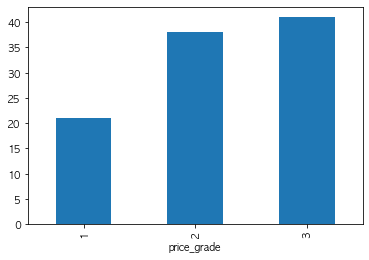

In [7]:
# 상품 가격 등급 분포
grouped = product.groupby('price_grade')
grouped.price_grade.count().plot(kind='bar')

## 거래 데이터 만들기 : purchase

### 거래 데이터프레임 만들기

#### 거래 데이터프레임 양식 만들기

In [8]:
purchase = pd.DataFrame(columns=['num_ts', 'cusno_ts', 'product_num_ts', 'price_ts',
                        'quantity', 'amount', 'date', 'year', 'weekday', 'hour'])
purchase

,num_ts,cusno_ts,product_num_ts,price_ts,quantity,amount,date,year,weekday,hour


### 거래 데이터프레임 데이터 채우기

#### 날짜,요일,시간 : date, day, time

In [9]:
# date
# date 간격 : 시간
date_list_20 = list(pd.date_range('2020-01-01', '2020-12-31', freq='H'))
date_list_21 = list(pd.date_range('2021-01-01', '2021-12-31', freq='H'))

# 2020 년 거래량 6000건
date_20 = np.random.choice(date_list_20, size=6000).tolist()
# 2021 년 거래량 4000건
date_21 = np.random.choice(date_list_21, size=4000).tolist()
date = date_20 + date_21
random.shuffle(date)
date = pd.Series(date)

# date 에서 년-월-일 형식의 날짜 추출
# purchase.date = date.dt.date
purchase.date = pd.to_datetime(date.dt.date)

# # year(년도)
purchase.year = date.dt.year

# # day(요일)
purchase.weekday = date.dt.weekday

# # 시간
purchase.hour = date.dt.hour

purchase = purchase.sort_values('date', ascending=True)
purchase = purchase.reset_index(drop=True)
purchase.head()

,num_ts,cusno_ts,product_num_ts,price_ts,quantity,amount,date,year,weekday,hour
0,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01,2020,2,1
1,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01,2020,2,13
2,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01,2020,2,2
3,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01,2020,2,8
4,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01,2020,2,14


#### 거래 번호 : num_ts

In [10]:
num_ts = np.arange(0, 10000)
purchase.num_ts = num_ts

#### 고객번호 : cusno_ts

In [11]:
# 기존 cusno가 중복될 수 있도록 만들기
cusno_ts = np.random.choice(list(np.arange(10000, 11000)), size=10000)
purchase.cusno_ts = cusno_ts

#### 상품코드 : product_num_ts

In [12]:
# product_num_ts = np.random.choice(list(product_num), size=10000).tolist()
# purchase.product_num_ts = product_num_ts

price_grade_1 = product[product['price_grade'] == '1'].product_num.tolist()
price_grade_2 = product[product['price_grade'] == '2'].product_num.tolist()
price_grade_3 = product[product['price_grade'] == '3'].product_num.tolist()
price_grade_3

price_grade_1_20 = np.random.choice(price_grade_1, 1000).tolist()
price_grade_2_20 = np.random.choice(price_grade_2, 2000).tolist()
price_grade_3_20 = np.random.choice(price_grade_3, 3000).tolist()
product_num_ts_20 = price_grade_1_20 + price_grade_2_20 + price_grade_3_20
random.shuffle(product_num_ts_20)


price_grade_1_21 = np.random.choice(price_grade_1, 1000).tolist()
price_grade_2_21 = np.random.choice(price_grade_2, 1500).tolist()
price_grade_3_21 = np.random.choice(price_grade_3, 1500).tolist()
product_num_ts_21 = price_grade_1_21 + price_grade_2_21 + price_grade_3_21
random.shuffle(product_num_ts_21)

product_num_ts_ = product_num_ts_20 + product_num_ts_21
purchase.product_num_ts = product_num_ts_

purchase.head()

,num_ts,cusno_ts,product_num_ts,price_ts,quantity,amount,date,year,weekday,hour
0,0,10166,87,NaN,NaN,NaN,2020-01-01,2020,2,1
1,1,10182,88,NaN,NaN,NaN,2020-01-01,2020,2,13
2,2,10680,69,NaN,NaN,NaN,2020-01-01,2020,2,2
3,3,10298,21,NaN,NaN,NaN,2020-01-01,2020,2,8
4,4,10107,98,NaN,NaN,NaN,2020-01-01,2020,2,14


#### 상품 가격 : price_ts

In [13]:
def price(x):
    price = product[product.product_num == x].price
    price = str(price).split()[1]
    return int(price)


purchase.price_ts = pd.Series(purchase.product_num_ts.map(price))

#### 구매수량 : quantity

In [14]:
# 2020년 구매수량 데이터 생성 : 6000개
a_20 = np.random.randint(1, 4, size=3000).tolist()
b_20 = np.random.randint(4, 7, size=2000).tolist()
c_20 = np.random.randint(7, 10, size=1000).tolist()
li_20 = a_20+b_20+c_20
random.shuffle(li_20)
purchase.quantity[purchase.year == 2020] = li_20

# 2021년 구매수량 데이터 생성 : 4000개
a_21 = np.random.randint(1, 4, size=2500).tolist()
b_21 = np.random.randint(4, 7, size=1000).tolist()
c_21 = np.random.randint(7, 10, size=500).tolist()
li_21 = a_21+b_21+c_21
random.shuffle(li_21)
purchase.quantity[purchase.year == 2021] = li_21
purchase = purchase.astype({'quantity': 'int'})
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   num_ts          10000 non-null  int64         
 1   cusno_ts        10000 non-null  int64         
 2   product_num_ts  10000 non-null  int64         
 3   price_ts        10000 non-null  int64         
 4   quantity        10000 non-null  int64         
 5   amount          0 non-null      object        
 6   date            10000 non-null  datetime64[ns]
 7   year            10000 non-null  int64         
 8   weekday         10000 non-null  int64         
 9   hour            10000 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 781.4+ KB


### *거래 데이터프레임 종속변수
- 선행 참조 변수 문제로 위치 이동

#### quantity 조정

In [15]:
# def check_region(x):
#     region = customer[customer.cusno == x].region
#     return int(region)


# purchase['ts_region'] = purchase.cusno_ts.map(check_region)
# purchase

In [16]:
# multi_20 = {1 :2, 2:1.3, 3:1.5, 4:0.6,5:0.5}
# multi_21 = {1 :2, 2:1.3, 3:1.5, 4:0.6,5:0.5}

# for i in [1,2,3,4,5]:
#     for j in [2020,2021]:
#         if j == 2020:
#             conditon = (purchase['ts_region'] == i ) & (purchase.year == j)
#             purchase.loc[conditon,'quantity'] = purchase.quantity * multi_20[i]
#         else:
#             conditon = (purchase['ts_region'] == i ) & (purchase.year == j)
#             purchase.loc[conditon,'quantity'] = purchase.quantity * multi_21[i]     

#### 거래별 거래총액 : amount

In [17]:
# def price(x):
#     price = product[product.product_num == x].price
#     price = str(price).split()[1]
#     return int(price)


# purchase.amount = pd.Series(purchase.product_num_ts.map(price))*purchase.quantity
# purchase.info()

## 고객 데이터프레임 만들기 : customer

### 고객 데이터프레임 양식 만들기

In [18]:
customer = pd.DataFrame(columns=['cusno', 'region', 'gender', 'age',  'income', 'grade_20',
                        'grade_21', 'ARPPU_20', 'ARPPU_21', 'AVC_20', 'AVC_21', 'ASC_20', 'ASC_21', 'purchase_trend'])
customer

,cusno,region,gender,age,income,grade_20,grade_21,ARPPU_20,ARPPU_21,AVC_20,AVC_21,ASC_20,ASC_21,purchase_trend


### 고객 데이터프레임 데이터 채우기

#### 고객 번호 : cusno

In [19]:
cusno = np.arange(10000, 11000)
customer.cusno = cusno

#### 거주 지역 : region

In [20]:
# 지역별 인구 분포 산정
area_1 = np.random.randint(1, 2, size=100).tolist()
area_2 = np.random.randint(2, 3, size=150).tolist()
area_3 = np.random.randint(3, 4, size=300).tolist()
area_4 = np.random.randint(4, 5, size=200).tolist()
area_5 = np.random.randint(5, 6, size=250).tolist()
li = area_1+area_2+area_3+area_4+area_5
random.shuffle(li)

customer.region = li

#### *거래량 데이터 가중치 부여

In [21]:
# 거래 데이터중에 지역정보 추가
def check_region(x):
    region = customer[customer.cusno == x].region
    return int(region)


purchase['ts_region'] = purchase.cusno_ts.map(check_region)
purchase.head()

,num_ts,cusno_ts,product_num_ts,price_ts,quantity,amount,date,year,weekday,hour,ts_region
0,0,10166,87,93148,8,NaN,2020-01-01,2020,2,1,2
1,1,10182,88,89406,8,NaN,2020-01-01,2020,2,13,3
2,2,10680,69,25883,2,NaN,2020-01-01,2020,2,2,5
3,3,10298,21,35908,2,NaN,2020-01-01,2020,2,8,5
4,4,10107,98,52544,5,NaN,2020-01-01,2020,2,14,3


In [22]:
# 거래 데이터중에서 수량 부분 가중치를 지역별로 적용
multi_20 = {1 :2, 2:1.3, 3:0.8, 4:0.6,5:0.5}
multi_21 = {1 :2, 2:1.3, 3:1, 4:0.8,5:0.5}

for i in [1,2,3,4,5]:
    for j in [2020,2021]:
        if j == 2020:
            conditon = (purchase['ts_region'] == i ) & (purchase.year == j)
            purchase.loc[conditon,'quantity'] = (purchase.quantity * multi_20[i]).astype(int)
        else:
            conditon = (purchase['ts_region'] == i ) & (purchase.year == j)
            purchase.loc[conditon,'quantity'] = (purchase.quantity * multi_21[i]).astype(int)     

In [23]:
# 거래 데이터중에서 수량 부분 가중치 상품 가격별 적용
multi_20 = {1 :1, 2:1, 3:1, 4:1,5:1}
multi_21 = {1 :1.5, 2:1, 3:0.5, 4:1,5:1}

for i in [1,2,3,4,5]:
    for j in [2020,2021]:
        if j == 2020:
            conditon = (purchase['ts_region'] == i ) & (purchase.year == j) & (purchase.price_ts > 80000)
            purchase.loc[conditon,'quantity'] = (purchase.quantity * multi_20[i]).astype(int)
        else:
            conditon = (purchase['ts_region'] == i ) & (purchase.year == j)& (purchase.price_ts > 80000)
            purchase.loc[conditon,'quantity'] = (purchase.quantity * multi_21[i]).astype(int)     

In [24]:
# amount 계산
def price(x):
    price = product[product.product_num == x].price
    price = str(price).split()[1]
    return int(price)


purchase.amount = pd.Series(purchase.product_num_ts.map(price))*purchase.quantity
purchase.head()

,num_ts,cusno_ts,product_num_ts,price_ts,quantity,amount,date,year,weekday,hour,ts_region
0,0,10166,87,93148,10,931480,2020-01-01,2020,2,1,2
1,1,10182,88,89406,6,536436,2020-01-01,2020,2,13,3
2,2,10680,69,25883,1,25883,2020-01-01,2020,2,2,5
3,3,10298,21,35908,1,35908,2020-01-01,2020,2,8,5
4,4,10107,98,52544,4,210176,2020-01-01,2020,2,14,3


#### 소득 : income

In [25]:
# 지역별 소득 분포 산정 : 정규분포 사용
customer.income[customer.region == 1] = np.random.normal(10, 3, 100)*20000
customer.income[customer.region == 2] = np.random.normal(10, 2, 150)*10000
customer.income[customer.region == 3] = np.random.normal(10, 1, 300)*5000
customer.income[customer.region == 4] = np.random.normal(10, 2, 200)*1000
customer.income[customer.region == 5] = np.random.normal(10, 0.5, 250)*3000
customer.income = customer.income.map(lambda x: int(x))

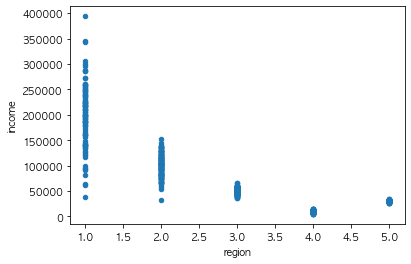

In [26]:
# 지역별 연봉 분포
customer.plot(x='region', y='income', kind='scatter');

##### 지역별 소득 값 중 이상치 보정

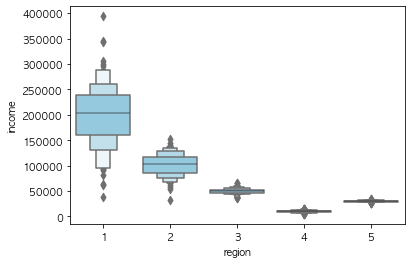

In [27]:
# 지역에 따른 소득 분포 확인 : by boxenplot
sns.boxenplot(x='region', y='income', data=customer, color='skyblue');

In [28]:
# 소득 컬럼의 통계 요약
customer.describe()

,cusno,region,income
count,1000.000000,1000.000000,1000.000000
mean,10499.500000,3.350000,59739.982000
std,288.819436,1.276373,58897.053713
min,10000.000000,1.000000,4937.000000
25%,10249.750000,2.750000,28551.000000
50%,10499.500000,3.000000,45200.500000
75%,10749.250000,4.250000,60155.750000
max,10999.000000,5.000000,393887.000000


In [29]:
# 고객 소득 데이터 이상치 처리
for i in range(1, 6):
    cus_info = customer[customer.region == i].describe()
    # 사분위 수(quartile)
    Q1 = cus_info["income"]["25%"]
    Q3 = cus_info["income"]["75%"]
    # 사분위간 범위(Interquartile range, IQR)
    IQR = Q3 - Q1
    print(f'{i}지역 이상치')
    mask = (customer[customer.region == i].income <= (Q1 - IQR*1.5)
            ) | (customer[customer.region == i].income >= (Q3 + IQR*1.5))
    outlier = customer[customer.region == i][mask].income
    print(outlier, '\n')

# lower whisker 보다 작거나, upper whisker 보다 큰 값들을 이상치로 판정

# 위와 같이 이상치가 발생하였으나 분석 결과 사전에 설정한 가정에 영향이 없다고 판단되어 보정하지 않음

1지역 이상치
119    393887
801     37695
Name: income, dtype: int64 

2지역 이상치
460    32335
Name: income, dtype: int64 

3지역 이상치
180    35895
247    37354
283    36486
517    66520
660    62485
830    65916
Name: income, dtype: int64 

4지역 이상치
531    15059
662    15181
766    15139
Name: income, dtype: int64 

5지역 이상치
260    25645
737    34111
Name: income, dtype: int64 



#### 연령 : age

##### 지역별 연령 데이터 산정

In [30]:
# 1 지역 연령 데이터 생성
age_1_old = np.random.normal(65, 6, 60).tolist()
age_1_young = np.random.normal(24, 3, 40).tolist()
age_1 = age_1_old + age_1_young
customer.age[customer.region == 1] = age_1

# 2 지역 연령 데이터 생성
age_2_old = np.random.normal(40, 3, 100).tolist()
age_2_young = np.random.normal(5, 3, 50).tolist()
age_2 = age_2_old + age_2_young
customer.age[customer.region == 2] = age_2

# # 3 지역 연령 데이터 생성
age_3 = np.random.randint(23, 57, size=300).tolist()
customer.age[customer.region == 3] = age_3

# # 4 지역 연령 데이터 생성
age_4 = np.random.randint(20, 28, size=200).tolist()
customer.age[customer.region == 4] = age_4

# # 5 지역 연령 데이터 생성
age_5 = np.random.randint(50, 85, size=250).tolist()
customer.age[customer.region == 5] = age_5

customer.age = customer.age.map(lambda x: int(x))

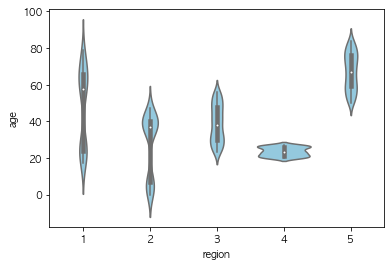

In [31]:
# 지역별 나이 분포
x = customer.region
y = customer.age
sns.violinplot(x, y, data=product, color='skyblue');

##### 지역별 연령 중 이상치 보정

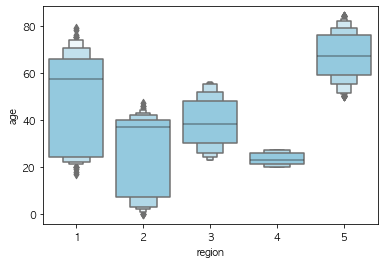

In [32]:
# 지역에 따른 연령 분포 확인 : by boxenplot
sns.boxenplot(x='region', y='age', data=customer, color='skyblue');

In [33]:
# 고객 연령 데이터 이상치 처리
for i in range(1, 6):
    cus_info = customer[customer.region == i].describe()
    # 사분위 수(quartile)
    Q1 = cus_info["age"]["25%"]
    Q3 = cus_info["age"]["75%"]
    # 사분위간 범위(Interquartile range, IQR)
    IQR = Q3-Q1
    print(f'{i}지역 이상치')
    mask = (customer[customer.region == i].age <= (Q1 - IQR*1.5)
            ) | (customer[customer.region == i].age >= (Q3 + IQR*1.5))
    outlier = customer[customer.region == i][mask].age
    print(outlier)

# lower whisker 보다 작거나, upper whisker 보다 큰 값들을 이상치로 판정
# 1지역: 0개
# 2지역: 0개
# 3지역: 0개
# 4지역: 0개
# 5지역: 0개

# 위와 같이 이상치가 발생하였으나 분석 결과 사전에 설정한 가정에 영향이 없다고 판단되어 보정하지 않음

1지역 이상치
Series([], Name: age, dtype: int64)
2지역 이상치
Series([], Name: age, dtype: int64)
3지역 이상치
Series([], Name: age, dtype: int64)
4지역 이상치
Series([], Name: age, dtype: int64)
5지역 이상치
Series([], Name: age, dtype: int64)


In [34]:
# 추가 이상치 검증 : 나이가 음수인 이상치 확인
grouped = customer.groupby('region').age
for i, j in grouped:
    print(i)
    print(j.value_counts().sort_index())

1
17    1
18    1
19    1
20    3
21    5
22    3
23    6
24    7
25    3
26    2
27    3
28    3
29    1
32    1
44    1
49    1
54    1
55    1
56    3
57    3
58    2
59    4
60    5
61    4
62    2
63    1
64    6
66    2
67    3
68    2
69    4
70    2
71    3
72    2
74    2
75    3
76    1
78    1
79    1
Name: age, dtype: int64
2
0      3
1      4
2      8
3      5
4      5
5      6
6      5
7      6
8      3
9      1
10     2
12     2
30     1
33     1
34     2
35     6
36     8
37    10
38    12
39    13
40    15
41     9
42     8
43     7
44     4
45     1
46     2
47     1
Name: age, dtype: int64
3
23    13
24     8
25     7
26    11
27    11
28    11
29    12
30     7
31    12
32    15
33     9
34     7
35     5
36     6
37     9
38     8
39     7
40     7
41     9
42    11
43     9
44     5
45     7
46     7
47     8
48     7
49    14
50    10
51     6
52     6
53     8
54     7
55    11
56    10
Name: age, dtype: int64
4
20    28
21    27
22    23
23    24
24    20
25   

In [35]:
customer

,cusno,region,gender,age,income,grade_20,grade_21,ARPPU_20,ARPPU_21,AVC_20,AVC_21,ASC_20,ASC_21,purchase_trend
0,10000,3,NaN,55,49390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,3,NaN,39,45163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10002,1,NaN,60,188152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10003,2,NaN,42,103289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10004,4,NaN,25,9862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10995,4,NaN,27,12532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,10996,2,NaN,2,122364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,10997,3,NaN,41,52803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,10998,5,NaN,74,27657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# 추가 이상치 검증 : 나이가 음수인 이상치를 절대값을 이용하여 유효한 값으로 보정
customer[customer.age <= 0] = abs(customer[customer.age <= 0])
customer.age.value_counts().sort_index()

0     3
1     4
2     8
3     5
4     5
     ..
80    4
81    8
82    5
83    6
84    7
Name: age, Length: 80, dtype: int64

#### 성별 : gender

##### 지역별 성별 데이터 산정

In [37]:
# 1 지역 성별 데이터 생성
gender_1_male = np.random.randint(0, 1, size=40).tolist()
gender_1_female = np.random.randint(1, 2, size=60).tolist()
gender_1 = gender_1_male + gender_1_female
random.shuffle(gender_1)
customer.gender[customer.region == 1] = gender_1

# 2 지역 성별 데이터 생성
gender_2 = np.random.randint(0, 2, size=150)
customer.gender[customer.region == 2] = gender_2

# 3 지역 성별 데이터 생성
gender_3 = np.random.randint(0, 2, size=300)
customer.gender[customer.region == 3] = gender_3

# 4 지역 성별 데이터 생성
gender_4 = np.random.randint(0, 2, size=200)
customer.gender[customer.region == 4] = gender_4

# 5 지역 성별 데이터 생성
gender_5 = np.random.randint(0, 2, size=250)
customer.gender[customer.region == 5] = gender_5

customer.gender = customer.gender.map(lambda x: int(x))
gender_count = customer.gender.value_counts().sort_index()

print(f'남성 : {gender_count[0]}명\n여성 : {gender_count[1]}명')

남성 : 514명
여성 : 486명


### 고객 데이터프레임 종속변수

#### 년도별 고객별 연간 매출액 : ASC_20, ASC_21

In [38]:
li_2020 = []
li_2021 = []
for i in range(10000, 11000):
    a = purchase[(purchase['cusno_ts'] == i) & (
        purchase["year"] == 2020)].amount.sum()
    b = purchase[(purchase['cusno_ts'] == i) & (
        purchase["year"] == 2021)].amount.sum()

    li_2020.append(a)
    li_2021.append(b)

customer.ASC_20 = li_2020
customer.ASC_21 = li_2021

#### 년도별 고객 등급 : grade_20, grade_21

In [39]:
# 고객 등급 선정
# 3가지 등급, 인원수 1:1:1 비율로 선정
grade_20_Silver = customer.sort_values('ASC_20').ASC_20.iloc[333]
grade_20_Gold = customer.sort_values('ASC_20').ASC_20.iloc[666]
grade_20_VIP = customer.sort_values('ASC_20').ASC_20.iloc[999]

grade_21_Silver = customer.sort_values('ASC_21').ASC_21.iloc[333]
grade_21_Gold = customer.sort_values('ASC_21').ASC_21.iloc[666]
grade_21_VIP = customer.sort_values('ASC_21').ASC_21.iloc[999]

bin_dividers_20 = [0, grade_20_Silver, grade_20_Gold, grade_20_VIP]
bin_dividers_21 = [0, grade_21_Silver, grade_21_Gold, grade_21_VIP]

bin_names = ['Silver', 'Gold', 'VIP']  # qcut
customer['grade_20'] = pd.cut(x=customer.ASC_20,  # 데이터 배열
                              bins=bin_dividers_20,  # 경계값 리스트
                              labels=bin_names,  # bin 이름
                              include_lowest=True)  # 첫 경계값 포함 여부
bin_names = ['Silver', 'Gold', 'VIP']
customer['grade_21'] = pd.cut(x=customer.ASC_21,  # 데이터 배열
                              bins=bin_dividers_21,  # 경계값 리스트
                              labels=bin_names,  # bin 이름
                              include_lowest=True)  # 첫 경계값 포함 여부

#### 년도별 고객별 연간 방문 횟수 : AVC_20, AVC_21

In [40]:
li_2020 = []
li_2021 = []
for i in range(10000, 11000):
    a = purchase[(purchase['cusno_ts'] == i) & (purchase["year"] == 2020)]
    li_2020.append(len(a))
    a = purchase[(purchase['cusno_ts'] == i) & (purchase["year"] == 2021)]
    li_2021.append(len(a))

customer.AVC_20 = li_2020
customer.AVC_21 = li_2021

#### 년도별 고객별 회당 평균 결제액(Average Revenue Per Paid User) : ARPPU_20, ARPPU_21

In [41]:
customer.ARPPU_20 = (customer.ASC_20 / customer.AVC_20).round()
customer.ARPPU_21 = (customer.ASC_21 / customer.AVC_21).round()

#### 고객별 구매 추세 변화 : purchase_trend

In [42]:
customer.purchase_trend = np.where(customer.ASC_21 > customer.ASC_20, 1, 0)
customer.head()

,cusno,region,gender,age,income,grade_20,grade_21,ARPPU_20,ARPPU_21,AVC_20,AVC_21,ASC_20,ASC_21,purchase_trend
0,10000,3,1,55,49390,VIP,Silver,165795.0,166647.0,8,1,1326360,166647,0
1,10001,3,0,39,45163,Gold,Gold,106999.0,88858.0,8,5,855995,444290,0
2,10002,1,0,60,188152,VIP,Silver,452225.0,51659.0,5,3,2261124,154976,0
3,10003,2,1,42,103289,VIP,VIP,217637.0,399200.0,7,2,1523460,798399,0
4,10004,4,0,25,9862,Gold,Silver,132702.0,NaN,6,0,796211,0,0


## DataFrame 확인

### 결측치 처리

In [43]:
customer.isnull().sum()

cusno              0
region             0
gender             0
age                0
income             0
grade_20           0
grade_21           0
ARPPU_20           4
ARPPU_21          22
AVC_20             0
AVC_21             0
ASC_20             0
ASC_21             0
purchase_trend     0
dtype: int64

In [44]:
customer.ARPPU_20.fillna(0, inplace=True)
customer.ARPPU_21.fillna(0, inplace=True)
customer.isnull().sum()

cusno             0
region            0
gender            0
age               0
income            0
grade_20          0
grade_21          0
ARPPU_20          0
ARPPU_21          0
AVC_20            0
AVC_21            0
ASC_20            0
ASC_21            0
purchase_trend    0
dtype: int64

In [45]:
product

,product_num,price,price_grade
0,1,18611,3
1,2,75606,2
2,3,9271,3
3,4,34432,3
4,5,16455,3
...,...,...,...
95,96,22456,3
96,97,69280,2
97,98,52544,2
98,99,49565,3


In [46]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product_num  100 non-null    int64 
 1   price        100 non-null    int64 
 2   price_grade  100 non-null    object
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [47]:
purchase

,num_ts,cusno_ts,product_num_ts,price_ts,quantity,amount,date,year,weekday,hour,ts_region
0,0,10166,87,93148,10,931480,2020-01-01,2020,2,1,2
1,1,10182,88,89406,6,536436,2020-01-01,2020,2,13,3
2,2,10680,69,25883,1,25883,2020-01-01,2020,2,2,5
3,3,10298,21,35908,1,35908,2020-01-01,2020,2,8,5
4,4,10107,98,52544,4,210176,2020-01-01,2020,2,14,3
...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,10542,49,61241,1,61241,2021-12-30,2021,3,1,3
9996,9996,10192,1,18611,3,55833,2021-12-30,2021,3,4,5
9997,9997,10322,30,86137,3,258411,2021-12-30,2021,3,10,5
9998,9998,10568,40,30057,9,270513,2021-12-30,2021,3,22,2


In [48]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   num_ts          10000 non-null  int64         
 1   cusno_ts        10000 non-null  int64         
 2   product_num_ts  10000 non-null  int64         
 3   price_ts        10000 non-null  int64         
 4   quantity        10000 non-null  int64         
 5   amount          10000 non-null  int64         
 6   date            10000 non-null  datetime64[ns]
 7   year            10000 non-null  int64         
 8   weekday         10000 non-null  int64         
 9   hour            10000 non-null  int64         
 10  ts_region       10000 non-null  int64         
dtypes: datetime64[ns](1), int64(10)
memory usage: 859.5 KB


In [49]:
customer

,cusno,region,gender,age,income,grade_20,grade_21,ARPPU_20,ARPPU_21,AVC_20,AVC_21,ASC_20,ASC_21,purchase_trend
0,10000,3,1,55,49390,VIP,Silver,165795.0,166647.0,8,1,1326360,166647,0
1,10001,3,0,39,45163,Gold,Gold,106999.0,88858.0,8,5,855995,444290,0
2,10002,1,0,60,188152,VIP,Silver,452225.0,51659.0,5,3,2261124,154976,0
3,10003,2,1,42,103289,VIP,VIP,217637.0,399200.0,7,2,1523460,798399,0
4,10004,4,0,25,9862,Gold,Silver,132702.0,0.0,6,0,796211,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10995,4,0,27,12532,Gold,Silver,92507.0,74065.0,8,3,740053,222196,0
996,10996,2,1,2,122364,VIP,VIP,198074.0,225279.0,6,7,1188442,1576956,1
997,10997,3,0,41,52803,Gold,Gold,179983.0,73524.0,5,5,899917,367621,0
998,10998,5,0,74,27657,Gold,VIP,97264.0,81160.0,8,9,778111,730438,0


In [50]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   cusno           1000 non-null   int64   
 1   region          1000 non-null   int64   
 2   gender          1000 non-null   int64   
 3   age             1000 non-null   int64   
 4   income          1000 non-null   int64   
 5   grade_20        1000 non-null   category
 6   grade_21        1000 non-null   category
 7   ARPPU_20        1000 non-null   float64 
 8   ARPPU_21        1000 non-null   float64 
 9   AVC_20          1000 non-null   int64   
 10  AVC_21          1000 non-null   int64   
 11  ASC_20          1000 non-null   int64   
 12  ASC_21          1000 non-null   int64   
 13  purchase_trend  1000 non-null   int64   
dtypes: category(2), float64(2), int64(10)
memory usage: 96.1 KB


# 데이터 분석 및 시각화

## 데이터프레임 Merge

In [51]:
# Merge purchase and customer
df = purchase.merge(customer, how='left', left_on='cusno_ts', right_on='cusno', left_index=False,
                    right_index=False, sort=False, suffixes=('_ts', '_c'), copy=True, indicator=False, validate=None)

# Merge additional product
df = df.merge(product, how='left', left_on='product_num_ts',
              right_on='product_num', suffixes=('', '_p'), copy=True, indicator=False,)
df

,num_ts,cusno_ts,product_num_ts,price_ts,quantity,amount,date,year,weekday,hour,...,ARPPU_20,ARPPU_21,AVC_20,AVC_21,ASC_20,ASC_21,purchase_trend,product_num,price,price_grade
0,0,10166,87,93148,10,931480,2020-01-01,2020,2,1,...,354870.0,185400.0,6,4,2129222,741599,0,87,93148,1
1,1,10182,88,89406,6,536436,2020-01-01,2020,2,13,...,175710.0,55619.0,5,4,878551,222475,0,88,89406,1
2,2,10680,69,25883,1,25883,2020-01-01,2020,2,2,...,76197.0,75965.0,7,5,533379,379823,0,69,25883,3
3,3,10298,21,35908,1,35908,2020-01-01,2020,2,8,...,28656.0,61658.0,7,6,200595,369945,1,21,35908,3
4,4,10107,98,52544,4,210176,2020-01-01,2020,2,14,...,198123.0,212718.0,10,4,1981233,850873,0,98,52544,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,10542,49,61241,1,61241,2021-12-30,2021,3,1,...,119059.0,124524.0,11,6,1309654,747145,0,49,61241,2
9996,9996,10192,1,18611,3,55833,2021-12-30,2021,3,4,...,68679.0,58876.0,10,5,686787,294382,0,1,18611,3
9997,9997,10322,30,86137,3,258411,2021-12-30,2021,3,10,...,106422.0,112266.0,3,4,319267,449064,1,30,86137,1
9998,9998,10568,40,30057,9,270513,2021-12-30,2021,3,22,...,243947.0,232117.0,7,4,1707626,928468,0,40,30057,3


In [52]:
# 중복을 제외하고 데이터 분석에 사용할 컬럼들로 이루어진 DataFrame 생성
df = df.loc[:, ['num_ts', 'date', 'product_num', 'price', 'price_grade', 'quantity', 'amount',
                'year', 'weekday', 'hour', 'cusno', 'region', 'gender', 'age', 'income',
                'grade_20', 'grade_21', 'ARPPU_20', 'ARPPU_21', 'AVC_20', 'AVC_21', 'ASC_20', 'ASC_21', 'purchase_trend']]
df

,num_ts,date,product_num,price,price_grade,quantity,amount,year,weekday,hour,...,income,grade_20,grade_21,ARPPU_20,ARPPU_21,AVC_20,AVC_21,ASC_20,ASC_21,purchase_trend
0,0,2020-01-01,87,93148,1,10,931480,2020,2,1,...,82356,VIP,VIP,354870.0,185400.0,6,4,2129222,741599,0
1,1,2020-01-01,88,89406,1,6,536436,2020,2,13,...,48009,Gold,Silver,175710.0,55619.0,5,4,878551,222475,0
2,2,2020-01-01,69,25883,3,1,25883,2020,2,2,...,31650,Gold,Gold,76197.0,75965.0,7,5,533379,379823,0
3,3,2020-01-01,21,35908,3,1,35908,2020,2,8,...,31372,Silver,Gold,28656.0,61658.0,7,6,200595,369945,1
4,4,2020-01-01,98,52544,2,4,210176,2020,2,14,...,54733,VIP,VIP,198123.0,212718.0,10,4,1981233,850873,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,2021-12-30,49,61241,2,1,61241,2021,3,1,...,39152,VIP,VIP,119059.0,124524.0,11,6,1309654,747145,0
9996,9996,2021-12-30,1,18611,3,3,55833,2021,3,4,...,30187,Gold,Silver,68679.0,58876.0,10,5,686787,294382,0
9997,9997,2021-12-30,30,86137,1,3,258411,2021,3,10,...,30117,Silver,Gold,106422.0,112266.0,3,4,319267,449064,1
9998,9998,2021-12-30,40,30057,3,9,270513,2021,3,22,...,117887,VIP,VIP,243947.0,232117.0,7,4,1707626,928468,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   num_ts          10000 non-null  int64         
 1   date            10000 non-null  datetime64[ns]
 2   product_num     10000 non-null  int64         
 3   price           10000 non-null  int64         
 4   price_grade     10000 non-null  object        
 5   quantity        10000 non-null  int64         
 6   amount          10000 non-null  int64         
 7   year            10000 non-null  int64         
 8   weekday         10000 non-null  int64         
 9   hour            10000 non-null  int64         
 10  cusno           10000 non-null  int64         
 11  region          10000 non-null  int64         
 12  gender          10000 non-null  int64         
 13  age             10000 non-null  int64         
 14  income          10000 non-null  int64         
 15  gra

## 의도한 데이터 경향성 확인
- 고객별 총 소비량 감소
- 누적 매출액 증가량 감소
- 지역별, 소득수준 별 소비량 변화
- 1 지역 고가품 소비 증가 경향
    - 집에서 즐길 수 있는 고가품들 (와인, 치즈 밀키트 등...)
- 5 지역 저가품 소비 증가 경향


### 고객별 총 소비량 감소

1    360
0    640
Name: purchase_trend, dtype: int64


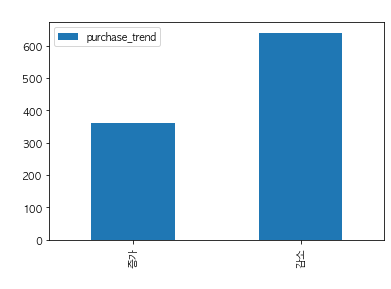

2020년 대비 2021년도 고객별 총 소비량이
 증가 360 명
 감소 640 명
으로 64.0% 고객들의 소비가 감소한 것으로 나타났다. 


In [54]:
a = customer.purchase_trend.value_counts()
a = a[::-1]
print(a)
a = a.rename(index={True: '증가', False: '감소'})
a.plot(kind='bar')
plt.title('2020년 대비 2021년도 고객별 평균 소비량 변화', color='white')
plt.xlabel('purchase_trend', color='white')
plt.ylabel('고객 수', color='white')
plt.legend()
plt.show()

print(
    f'2020년 대비 2021년도 고객별 총 소비량이\n 증가 {a[0]} 명\n 감소 {a[1]} 명\n으로 {a[1]/(10)}% 고객들의 소비가 감소한 것으로 나타났다. ')

###  누적 매출액 증가량 감소

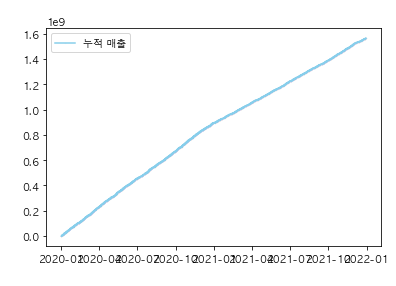

In [55]:
# 매출 누적 그래프
x = purchase.date
y = purchase.amount.cumsum()

plt.figure(figsize=(6, 4))
plt.plot(x, y, color='skyblue', marker='.', markersize=0.1)
plt.title('매출 누적 그래프', size=20, color='white')
plt.xlabel('날짜', size=10, color='white')
plt.ylabel('누적매출', size=10, color='white')
plt.legend(labels=['누적 매출'])
plt.show()

### 지역별 소비량 변화

<AxesSubplot:xlabel='region'>

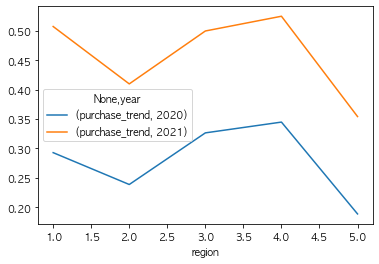

In [56]:
table = df.pivot_table(index=['region'],columns=['year'], values=[
                       'purchase_trend'], aggfunc='mean')
table.plot()

### 연도,지역별 고가품 소비 증감 현황

In [57]:
df.columns

Index(['num_ts', 'date', 'product_num', 'price', 'price_grade', 'quantity',
       'amount', 'year', 'weekday', 'hour', 'cusno', 'region', 'gender', 'age',
       'income', 'grade_20', 'grade_21', 'ARPPU_20', 'ARPPU_21', 'AVC_20',
       'AVC_21', 'ASC_20', 'ASC_21', 'purchase_trend'],
      dtype='object')

In [58]:
df2=df[['region','price_grade','year','quantity']]
df2.head()

,region,price_grade,year,quantity
0,2,1,2020,10
1,3,1,2020,6
2,5,3,2020,1
3,5,3,2020,1
4,3,2,2020,4


<AxesSubplot:ylabel='year,region'>

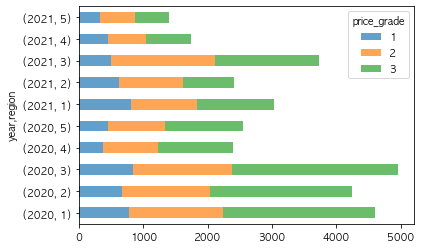

In [59]:
grouped=df2.groupby(['year','region','price_grade'])
grouped.quantity.sum().unstack().plot.barh(stacked=True,alpha=0.7)

## 분석 결과 알 수 있는 정보

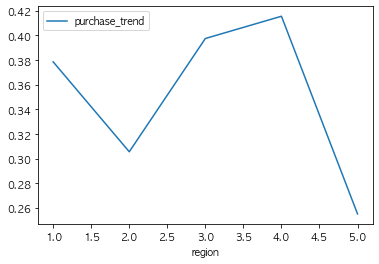

In [60]:
table = df.pivot_table(index=['region'], values=[
                       'purchase_trend'], aggfunc=np.mean)
table.plot();

# 최근 경기변화에 민감하게 반응하여 눈에 띄게 소비량이 떨어진 지역은 2,5지역임을 알수있음.


# 2지역은 본래 앵갤지수가 낮은 지역임을 알 수 있었다.
# (앵갤지수 : 가계지출 대비 식료품 비율, 높은 수록 서민층)

# 필수소비재 위주로 소비를 하는 5지역은 최근 경기변화에도 다른지역에 비해 소비성향의 변화가 적었다.

### 연도별 지역별 총매출

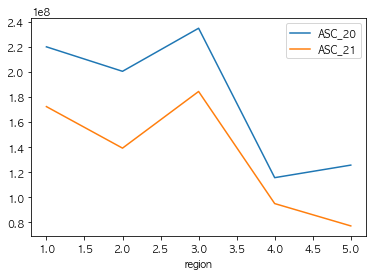

In [61]:
table = customer.pivot_table(index=['region'],values=['ASC_20','ASC_21'],aggfunc=np.sum)
table.plot();

### 데이터 예측 모델링

In [62]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 독립변수, 종속 변수 분리
X = customer[['region', 'gender','age','income','ARPPU_20', 'AVC_20', 'ASC_20']]
y = customer['purchase_trend']

# 학습용 테이터와 평가용 데이터를 8:2로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=10)
print(X_train.shape)
print(X_test.shape)

(800, 7)
(200, 7)


In [63]:
# Decision Tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print(dt_pred[0:10])
print(y_test.values[0:10])

accuracy = accuracy_score(y_test, dt_pred)
print('dt 예측 정확도 :', accuracy)

[1 1 1 1 0 0 0 1 0 0]
[1 1 0 0 0 1 1 1 1 0]
dt 예측 정확도 : 0.72


In [64]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
print('rf 예측 정확도 :', rf_accuracy)

rf 예측 정확도 : 0.8


In [65]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_pred)
print('lr 예측 정확도 :', accuracy)

lr 예측 정확도 : 0.72


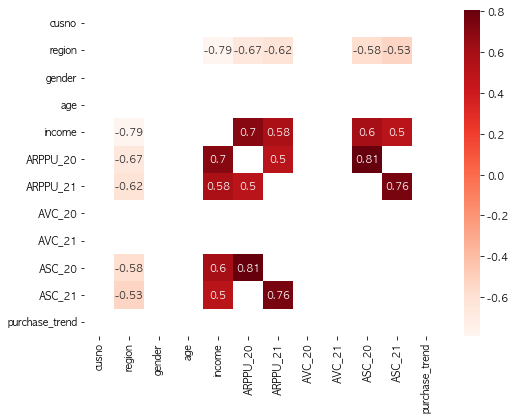

In [66]:
dfCorr = customer.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(8,6))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()